# Encoding (Label encoding and One-hot encoding)


These are simple exercises useful for notebook 2 (5 points)

In [2]:
import pandas as pd


Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [3]:
df = pd.read_csv("grades.csv")

In [4]:

def label( array ):
    labels = ["F","E","D","C","B","A","S"]
    return map( labels.index, array )

df['Grades'] = list(label(df['Grades']))


Open 'color.csv' and use appropriate encoding technique to convert to numerical data

In [5]:
df = pd.read_csv("color.csv")

In [6]:
# Answer
y = pd.get_dummies(df['Color'])
y.columns
df[y.columns] = y
df

,Objects,Color,Blue,Green,Red,Yellow
0,Leaves,Green,0,1,0,0
1,Blood,Red,0,0,1,0
2,Sea,Blue,1,0,0,0
3,Rose,Red,0,0,1,0
4,Sun flower,Yellow,0,0,0,1
5,Apple,Red,0,0,1,0
6,Mango,Yellow,0,0,0,1
7,Banana,Yellow,0,0,0,1


Answer the following for both the data  
- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


# Regularized Least Squares 

## Ridge Regression (5 points)

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$



Complete the following functions for ridge rigression using gradient descent (without sklearn) 


Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [7]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    J = 0
    m =  len(X)    # number of training examples
    
    h =  np.dot(X, theta).flatten()    # Predictions of X for a given theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = (1/(2 * m)) * np.sum(np.square(h - y)) + J_reg
    return J

In [8]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    m = len(X)  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    change_in_cost = 100
    prev_cost = 0
    iters = 0
    
    while iters < max_iters:
       
        theta = (theta - (alpha / m) * (X_appended.T @ (np.dot(X_appended, theta).flatten() - y) - lamda * theta)).flatten()
        
        cost = computeCost(X_appended, y, theta,lamda)
        change_in_cost = abs(cost - prev_cost)
        prev_cost = cost
        J_history.append(cost)
        iters += 1
    
    return theta, J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

In [9]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

Using functions written above try to fit the data with polynomial of degree 3 and 

- plot the cost along the iterations  
- plot the fit on train data.
- For $\lambda$ = [0,100,10000]
- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000

- Write comment how the fit changes as lambda and what is the reason?
Ans: Underfitting (as regularization increased)

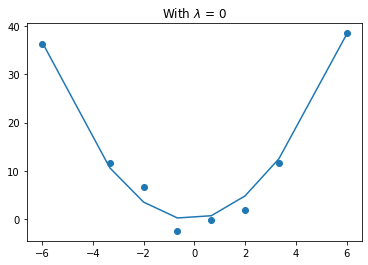

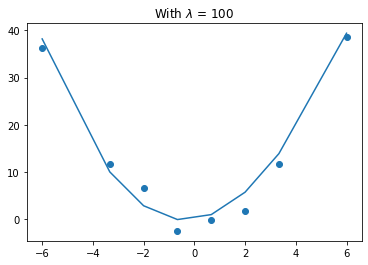

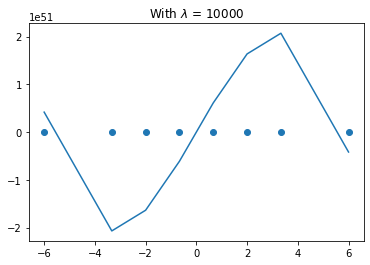

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

X = data['X_train']
Y = data['y_train']
ii = np.argsort(X)
X = X[ii]
Y = Y[ii]
Y.reshape(8,1)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X[:, None])
theta = np.random.rand(3)
lambdas = [0,100,10000]
for lamda in lambdas:
    theta, _ = gradientDescent(X_poly,Y,theta,lamda=lamda,alpha = 0.0001,max_iters=1000)
    y_hat = X_poly @ theta
    plt.figure()
    plt.plot(X,y_hat)
    plt.scatter(X,Y)
    plt.title("With $\lambda$ = {}".format(lamda))


## Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

Use "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models

In [11]:
import numpy as np
from matplotlib import pyplot as plt
data = np.load("dataWeek4Train.npz")
data_test = np.load("dataWeek4Test.npz")

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).


Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

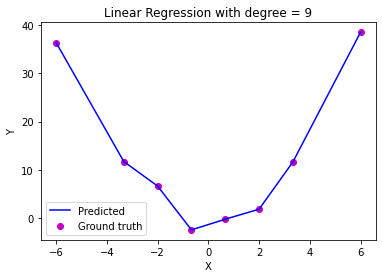

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def regression(X,Y,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X[:, None])

    if reg_type == "linear":
        reg = linear_model.LinearRegression().fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    elif reg_type == "ridge":
        reg = linear_model.Ridge(alpha=alpha,max_iter = MAX_ITER).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    elif reg_type == "lasso":
        reg = linear_model.Lasso(alpha=alpha,max_iter = MAX_ITER).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    else:
        print("Invalid regression type")
    return Y_hat, mse , reg


X = data['X_train']
Y = data['y_train']
ii = np.argsort(X)
X = X[ii]
Y = Y[ii]
mse_list = []
Y_hat, mse , reg = regression(X,Y,reg_type="linear",degree=9)
    
plt.figure()
plt.scatter(X, Y,color='m',label='Ground truth')
plt.plot(X, Y_hat,color='b',label='Predicted');
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with degree = {}'.format(9))
plt.legend()



## Ridge Rigression and Lasso for polynomial fitting with degree 9 (10 points total)
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn

[ 1.55319362e+00  1.60949776e-01  4.42695083e-01  4.86388385e-01
 -4.54845888e-01 -4.55954538e-02  4.68985793e-02  9.10966890e-04
 -9.62082898e-04]
[-1.14550678e+00  1.38499965e+00  1.05999422e-01 -1.81842662e-02
 -4.77370916e-04  1.79761406e-04 -2.83996252e-05  2.57116824e-06
 -3.25364936e-07]
[ 7.44108589e-01  1.59227337e-01  1.92019643e-01  4.81193045e-01
 -2.78414042e-01 -4.49907798e-02  2.98146700e-02  8.98199773e-04
 -6.17811048e-04]
[-0.00000000e+00  9.45360808e-01 -2.85468333e-02  1.97430837e-02
  1.77747810e-03 -3.71187319e-04 -1.30398605e-05 -2.44338732e-06
 -2.90013643e-07]
[-7.44481536e-05  2.43355499e-04 -3.10644737e-04  1.58106688e-03
 -8.54353735e-04  9.95073541e-03  6.17908871e-05 -2.56149945e-04
 -9.43202861e-07]
[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.93067649e-05
  1.03278897e-07]
[-8.41944511e-10  1.37336483e-08 -4.10293246e-09  1.60946222e-07
 -1.85729179e-08  1.78835737e-06 -8.15144653e-0

F:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.42286e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
<ipython-input-13-7b267fd84dfa>:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = linear_model.Lasso(alpha=alpha).fit(X_poly, Y)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7821044357313855, tolerance: 0.17776156780405505
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

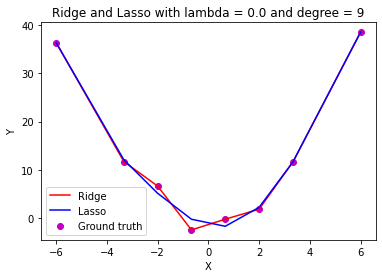

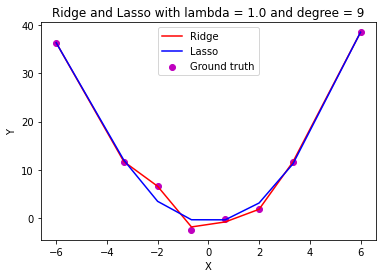

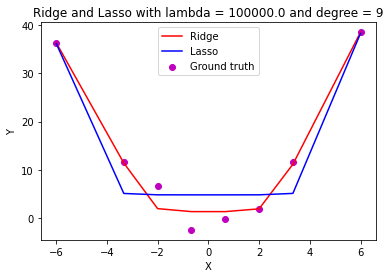

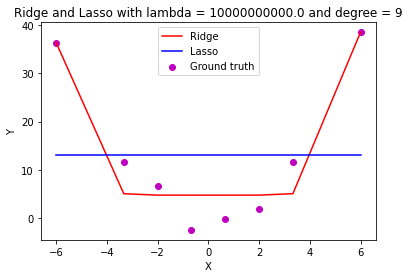

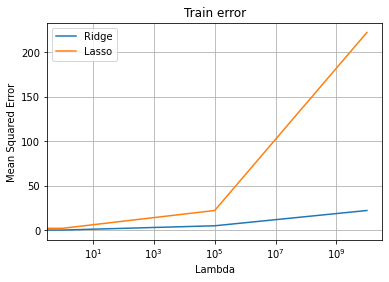

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def regression(X,Y,reg_type ="ridge",degree = 3,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X[:, None])

    if reg_type == "linear":
        reg = linear_model.LinearRegression().fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    elif reg_type == "ridge":
        reg = linear_model.Ridge(alpha=alpha).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    elif reg_type == "lasso":
        reg = linear_model.Lasso(alpha=alpha).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly)
        mse = mean_squared_error(Y,Y_hat) 
    else:
        print("Invalid regression type")
    return Y_hat, mse , reg


X = data['X_train']
Y = data['y_train']

ii = np.argsort(X)
X = X[ii]
Y=Y[ii]
mse_list_r = []
mse_list_l = []

alphas = np.logspace(0,10,3)
alphas = np.append(0,alphas)

for alpha in alphas:

    Y_hat_r, mse_r , reg_r = regression(X,Y,reg_type="ridge",degree=9,alpha=alpha)
    Y_hat_l, mse_l , reg_l = regression(X,Y,reg_type="lasso",degree=9,alpha=alpha)
    mse_list_r.append(mse_r)
    mse_list_l.append(mse_l)
    # print(reg_r.coef_)
    # print(reg_l.coef_)
    plt.figure()
    plt.scatter(X, Y,color='m',label='Ground truth')
    plt.plot(X, Y_hat_r,color='r',label='Ridge')
    plt.plot(X, Y_hat_l,color='b',label='Lasso')
    print(reg_r.coef_)
    print(reg_l.coef_) 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Ridge and Lasso with lambda = {} and degree = {}'.format(alpha,9))
    plt.legend()
 
plt.figure()
plt.plot(alphas,mse_list_r,label="Ridge")
plt.plot(alphas,mse_list_l,label="Lasso")
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Train error')
plt.grid()
plt.xscale('log')
# plt.yscale('log')
plt.legend()


## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression

[-8.41944511e-10  1.37336483e-08 -4.10293246e-09  1.60946222e-07
 -1.85729179e-08  1.78835737e-06 -8.15144653e-08  1.94013952e-05
  1.09490809e-07]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


F:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.42286e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
<ipython-input-14-5801f1d5a1fb>:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg = linear_model.Lasso(alpha=alpha).fit(X_poly, Y)
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7821044357313855, tolerance: 0.17776156780405505
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

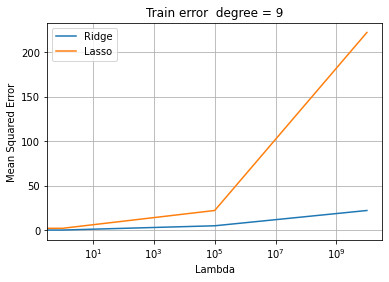

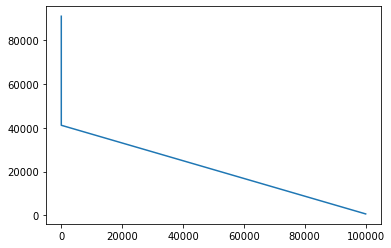

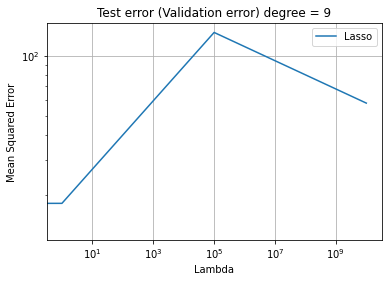

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def regression(X,Y,X_test,y_test,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X[:, None])
    X_poly_test = poly.transform(X_test[:,None])

    if reg_type == "linear":
        reg = linear_model.LinearRegression().fit(X, Y)
        Y_hat = reg.predict(X_poly_test)
        mse = mean_squared_error(y_test,Y_hat)
        Y_tr = reg.predict(X_poly)
        mse_t = mean_squared_error(Y,Y_tr)  
    elif reg_type == "ridge":
        reg = linear_model.Ridge(alpha=alpha).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly_test)
        mse = mean_squared_error(y_test,Y_hat) 
        Y_tr = reg.predict(X_poly)
        mse_t = mean_squared_error(Y,Y_tr)
    elif reg_type == "lasso":
        reg = linear_model.Lasso(alpha=alpha).fit(X_poly, Y)
        Y_hat = reg.predict(X_poly_test)
        mse = mean_squared_error(y_test,Y_hat) 
        Y_tr = reg.predict(X_poly)
        mse_t = mean_squared_error(Y,Y_tr)
    else:
        print("Invalid regression type")
    return Y_hat, mse ,mse_t, reg


X = data['X_train']
Y = data['y_train']
X_test = data_test['X_test']
y_test = data_test['y_test']
ii = np.argsort(X)
X = X[ii]
Y=Y[ii]

jj = np.argsort(X_test)
X_test = X_test[jj]
y_test=y_test[jj]

mse_list_r = []
mse_list_l = []
mse_list_tr = []
mse_list_tl = []

alphas = np.logspace(0,10,3)
alphas = np.append(0,alphas)

for alpha in alphas:

    Y_hat_r, mse_r , mse_tr, reg_r = regression(X,Y,X_test,y_test,reg_type="ridge",degree=9,alpha=alpha)
    Y_hat_l, mse_l , mse_tl, reg_l = regression(X,Y,X_test,y_test,reg_type="lasso",degree=9,alpha=alpha)
    mse_list_r.append(mse_r)
    mse_list_l.append(mse_l)
    mse_list_tr.append(mse_tr)
    mse_list_tl.append(mse_tl)
    
print(reg_r.coef_)
print(reg_l.coef_)

plt.figure()
plt.plot(alphas,mse_list_tr,label="Ridge")
plt.plot(alphas,mse_list_tl,label="Lasso")
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.xscale('log')
# plt.yscale('log')
plt.title('Train error  degree = {}'.format(9))
plt.legend()


plt.figure()
plt.plot(alphas[:3],mse_list_r[:3],label="Ridge")
plt.figure()
plt.plot(alphas,mse_list_l,label="Lasso")
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Test error (Validation error) degree = {}'.format(9))
plt.legend()



### Questions and Observations

- What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?

Ans: It was overfitting the data, and the model is complex since it has more features.

-  As value of lambda increases what happens to the model complexity?

Ans: Decreases

- What can be infered from the mean squared error versus lambda?

Ans: Due to decrease in model complexity is not able to fit the data properly, hence there is a large error as lambda increases.

- Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)

Ans: True, with regularization even at higher polynomial model is able to fit the data with less overfitting. 

- Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?

Ans: As the model complexity decreased due to regulaization the overfitting is reduced hence the validation error started to decrease for large $\lambda$

